In [67]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, recall_score
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv(r"C:\Users\Gyegn\OneDrive\Desktop\Customer churn\botswana_bank_customer_churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [5]:
len(df['Occupation'].unique()) #no.of different occupations

639

In [6]:
df.shape

(115640, 25)

In [8]:
df.groupby('Occupation').count().sum()

RowNumber                          115640
CustomerId                         115640
Surname                            115640
First Name                         115640
Date of Birth                      115640
Gender                             115640
Marital Status                     115640
Number of Dependents               115640
Income                             115640
Education Level                    115640
Address                            115640
Contact Information                115640
Customer Tenure                    115640
Customer Segment                   115640
Preferred Communication Channel    115640
Credit Score                       115640
Credit History Length              115640
Outstanding Loans                  115640
Churn Flag                         115640
Churn Reason                        14094
Churn Date                          14094
Balance                            115640
NumOfProducts                      115640
NumComplaints                     

In [9]:
df.isnull().sum() #to find Null values

RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

In [10]:
df1 = df.drop(['RowNumber','CustomerId','Surname','First Name','Churn Reason','Churn Date','Address','Contact Information'],axis = 1)

In [11]:
df1.shape #8-columns are dropped

(115640, 17)

In [13]:
df1['Date of Birth'] # Check the type of Date of Birth

0         1987-08-29
1         2000-02-07
2         1954-02-03
3         1991-01-15
4         1992-04-08
             ...    
115635    1965-03-09
115636    1955-01-10
115637    1955-08-29
115638    1992-12-27
115639    1974-11-07
Name: Date of Birth, Length: 115640, dtype: object

In [14]:
# Change the data_type to datetime
df['DOB'] = pd.to_datetime(df1['Date of Birth']) 

In [15]:
df['DOB']

0        1987-08-29
1        2000-02-07
2        1954-02-03
3        1991-01-15
4        1992-04-08
            ...    
115635   1965-03-09
115636   1955-01-10
115637   1955-08-29
115638   1992-12-27
115639   1974-11-07
Name: DOB, Length: 115640, dtype: datetime64[ns]

In [16]:
today = pd.Timestamp(datetime.now())
today

Timestamp('2024-10-16 17:13:54.772090')

In [17]:
# Calculate the age using Date-of-Birth
age = df['DOB'].apply(lambda x: today.year-x.year-((today.month,today.day)<(x.month,x.day)))

In [18]:
age

0         37
1         24
2         70
3         33
4         32
          ..
115635    59
115636    69
115637    69
115638    31
115639    49
Name: DOB, Length: 115640, dtype: int64

In [21]:
df1['age'] = age

In [22]:
df1.head()

,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,age
0,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,High School,30,Retail,Phone,397,24,41959.74,0,211359.05,1,0,37
1,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,High School,27,SME,Email,665,10,8916.67,0,30624.76,4,1,24
2,1954-02-03,Female,Single,1,Television production assistant,9794.01,High School,14,Retail,Email,715,21,43270.54,0,111956.61,2,6,70
3,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,Phone,747,17,17887.65,0,201187.61,1,0,33
4,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,Email,549,25,32686.84,0,60391.24,5,6,32


In [23]:
df1.pop('age')

0         37
1         24
2         70
3         33
4         32
          ..
115635    59
115636    69
115637    69
115638    31
115639    49
Name: age, Length: 115640, dtype: int64

In [24]:
# Insert age column next to Date of Birth
df1.insert(1,'age',age)

In [25]:
df1.head()

,Date of Birth,age,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,1987-08-29,37,Male,Divorced,3,Information systems manager,77710.14,High School,30,Retail,Phone,397,24,41959.74,0,211359.05,1,0
1,2000-02-07,24,Female,Married,1,Charity fundraiser,58209.87,High School,27,SME,Email,665,10,8916.67,0,30624.76,4,1
2,1954-02-03,70,Female,Single,1,Television production assistant,9794.01,High School,14,Retail,Email,715,21,43270.54,0,111956.61,2,6
3,1991-01-15,33,Female,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,Phone,747,17,17887.65,0,201187.61,1,0
4,1992-04-08,32,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,Email,549,25,32686.84,0,60391.24,5,6


In [26]:
# Drop Date of Birth
df1.drop(['Date of Birth'],axis = 1,inplace = True)

In [27]:
df1.head()

,age,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,37,Male,Divorced,3,Information systems manager,77710.14,High School,30,Retail,Phone,397,24,41959.74,0,211359.05,1,0
1,24,Female,Married,1,Charity fundraiser,58209.87,High School,27,SME,Email,665,10,8916.67,0,30624.76,4,1
2,70,Female,Single,1,Television production assistant,9794.01,High School,14,Retail,Email,715,21,43270.54,0,111956.61,2,6
3,33,Female,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,Phone,747,17,17887.65,0,201187.61,1,0
4,32,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,Email,549,25,32686.84,0,60391.24,5,6


In [28]:
df1['Churn Flag'].unique()   # 0: Not Churned
                             # 1: Churned

array([0, 1], dtype=int64)

# Types of Encoding

In [29]:
# One-hot Encoding
df1 = pd.get_dummies(df1,columns=['Gender'],drop_first = True) 

In [30]:
df1.head()

,age,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Gender_Male
0,37,Divorced,3,Information systems manager,77710.14,High School,30,Retail,Phone,397,24,41959.74,0,211359.05,1,0,1
1,24,Married,1,Charity fundraiser,58209.87,High School,27,SME,Email,665,10,8916.67,0,30624.76,4,1,0
2,70,Single,1,Television production assistant,9794.01,High School,14,Retail,Email,715,21,43270.54,0,111956.61,2,6,0
3,33,Divorced,5,Agricultural engineer,15088.98,High School,23,Corporate,Phone,747,17,17887.65,0,201187.61,1,0,0
4,32,Divorced,2,"Teacher, early years/pre",60726.56,Master's,22,Corporate,Email,549,25,32686.84,0,60391.24,5,6,0


In [31]:
# Label Encoding
le = LabelEncoder()    
df1['Marital Status']=le.fit_transform(df1['Marital Status'])

In [32]:
# df1['Preferred Communication Channel']=le.fit_transform(df1['Preferred Communication Channel'])
#One-hot Encoding
df1 = pd.get_dummies(df1,columns=['Preferred Communication Channel'],drop_first=True) 

In [33]:
df1['Customer Segment'].unique()

array(['Retail', 'SME', 'Corporate'], dtype=object)

In [34]:
df1['Customer Segment']=le.fit_transform(df1['Customer Segment'])

In [35]:
df1['Customer Segment'].unique()

array([1, 2, 0])

In [36]:
df1['Education Level'].unique()

array(['High School', "Master's", "Bachelor's", 'Diploma'], dtype=object)

In [37]:
# Ordinal Encoding
order = ["High School","Diploma","Bachelor's","Master's"]
oe = OrdinalEncoder(categories=[order])

In [38]:
oe.fit_transform(df1[['Education Level']])

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [2.]])

In [39]:
df1['Education Level'] = oe.fit_transform(df1[['Education Level']])

In [40]:
df1.head()

,age,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Gender_Male,Preferred Communication Channel_Phone
0,37,0,3,Information systems manager,77710.14,0.0,30,1,397,24,41959.74,0,211359.05,1,0,1,1
1,24,1,1,Charity fundraiser,58209.87,0.0,27,2,665,10,8916.67,0,30624.76,4,1,0,0
2,70,2,1,Television production assistant,9794.01,0.0,14,1,715,21,43270.54,0,111956.61,2,6,0,0
3,33,0,5,Agricultural engineer,15088.98,0.0,23,0,747,17,17887.65,0,201187.61,1,0,0,1
4,32,0,2,"Teacher, early years/pre",60726.56,3.0,22,0,549,25,32686.84,0,60391.24,5,6,0,0


In [41]:
# Frequency Encoding
frequency_encoded = df1['Occupation'].value_counts(normalize=False)

In [42]:
frequency_encoded['Agricultural engineer']

172

In [43]:
df1['Occupation'] = df1['Occupation'].map(frequency_encoded)

In [45]:
df1.head()  # All columns of the data set consist of numerical values

,age,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Gender_Male,Preferred Communication Channel_Phone
0,37,0,3,184,77710.14,0.0,30,1,397,24,41959.74,0,211359.05,1,0,1,1
1,24,1,1,184,58209.87,0.0,27,2,665,10,8916.67,0,30624.76,4,1,0,0
2,70,2,1,166,9794.01,0.0,14,1,715,21,43270.54,0,111956.61,2,6,0,0
3,33,0,5,172,15088.98,0.0,23,0,747,17,17887.65,0,201187.61,1,0,0,1
4,32,0,2,162,60726.56,3.0,22,0,549,25,32686.84,0,60391.24,5,6,0,0


In [46]:
target = df1['Churn Flag']
count = target.value_counts()

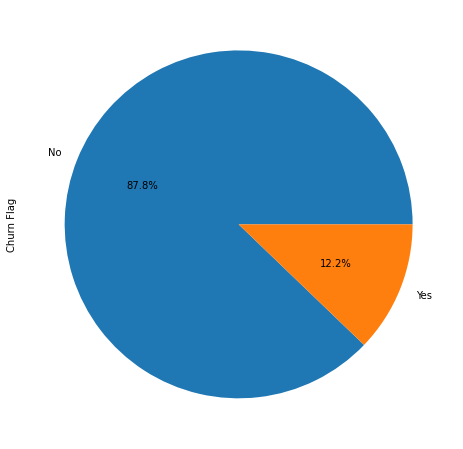

In [47]:
# Proportional representation of the target label in the total dataset
labels = ['Yes','No']

target.value_counts().plot(kind='pie', labels=['No','Yes'], figsize=(8,8), autopct='%1.1f%%')
plt.show()

In [48]:
(target==1).sum()  # One observation is that the churn reason and churn date are equal in number with positive churn

14094

In [54]:
features = df1.drop(columns = 'Churn Flag')

In [55]:
features.shape

(115640, 16)

In [56]:
target.shape

(115640,)

In [57]:
df1.shape

(115640, 17)

In [49]:
# Correlation Matrix
corr_matrix = df1.corr()
corr_matrix

,age,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Gender_Male,Preferred Communication Channel_Phone
age,1.000000,0.002850,-0.005167,0.004032,0.006660,0.004242,0.000650,-0.001556,0.003477,-0.000245,0.002370,-0.002366,0.003513,0.001847,0.000227,0.001527,0.002546
Marital Status,0.002850,1.000000,-0.004834,0.003154,-0.000890,0.007196,-0.005409,-0.000612,0.000818,-0.001810,-0.004501,-0.003774,-0.000912,0.001328,0.001763,-0.005979,0.000355
Number of Dependents,-0.005167,-0.004834,1.000000,0.001483,0.004704,0.002839,-0.003808,0.004471,-0.000461,-0.002335,-0.003493,0.003109,-0.000452,-0.002314,0.004543,-0.001418,-0.000297
Occupation,0.004032,0.003154,0.001483,1.000000,0.004661,0.002826,0.001366,0.000832,0.001201,0.000356,-0.002702,0.003090,-0.001563,-0.002317,0.001993,-0.002593,-0.002901
Income,0.006660,-0.000890,0.004704,0.004661,1.000000,-0.003704,0.001159,-0.002162,-0.008098,0.000712,0.004096,0.002286,0.002653,0.004452,0.005308,0.000422,0.004903
Education Level,0.004242,0.007196,0.002839,0.002826,-0.003704,1.000000,-0.001504,-0.003304,-0.002409,0.005187,-0.003642,0.002939,0.002807,0.002559,0.001083,0.000356,-0.001544
Customer Tenure,0.000650,-0.005409,-0.003808,0.001366,0.001159,-0.001504,1.000000,-0.001843,-0.001548,0.007297,0.001418,0.000344,-0.005291,0.002530,-0.001830,0.001305,0.003623
Customer Segment,-0.001556,-0.000612,0.004471,0.000832,-0.002162,-0.003304,-0.001843,1.000000,-0.002784,-0.002602,-0.001119,0.002480,-0.004135,-0.000964,-0.006217,0.000328,0.003762
Credit Score,0.003477,0.000818,-0.000461,0.001201,-0.008098,-0.002409,-0.001548,-0.002784,1.000000,-0.002725,-0.001490,-0.182802,0.002147,-0.002121,0.000217,-0.004232,-0.008245
Credit History Length,-0.000245,-0.001810,-0.002335,0.000356,0.000712,0.005187,0.007297,-0.002602,-0.002725,1.000000,-0.001829,0.002899,-0.001248,0.002295,0.004391,-0.001435,-0.002714


In [50]:
# Correlation of target column with the rest of the columns
corr_matrix['Churn Flag']*100

age                                       -0.236589
Marital Status                            -0.377399
Number of Dependents                       0.310908
Occupation                                 0.309046
Income                                     0.228553
Education Level                            0.293900
Customer Tenure                            0.034394
Customer Segment                           0.247973
Credit Score                             -18.280242
Credit History Length                      0.289909
Outstanding Loans                         -0.114636
Churn Flag                               100.000000
Balance                                  -49.998101
NumOfProducts                            -17.908250
NumComplaints                             20.462633
Gender_Male                                0.128036
Preferred Communication Channel_Phone      0.006877
Name: Churn Flag, dtype: float64

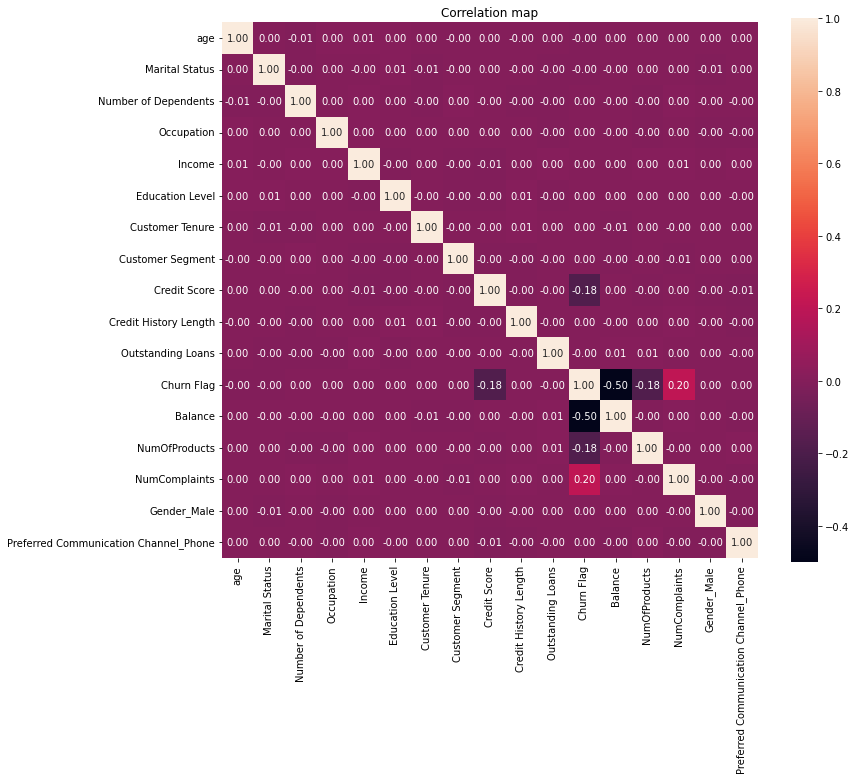

In [51]:
# Heat map
plt.figure(figsize=(12,10)) #plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,annot=True,square=True, fmt=".2f")
plt.title('Correlation map')
# plt.savefig('Correlation map.png')
plt.show()

In [52]:
# Copying the transformed data set to a new variable
dfc = df1.copy()
dfc.head()

,age,Marital Status,Number of Dependents,Occupation,Income,Education Level,Customer Tenure,Customer Segment,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Gender_Male,Preferred Communication Channel_Phone
0,37,0,3,184,77710.14,0.0,30,1,397,24,41959.74,0,211359.05,1,0,1,1
1,24,1,1,184,58209.87,0.0,27,2,665,10,8916.67,0,30624.76,4,1,0,0
2,70,2,1,166,9794.01,0.0,14,1,715,21,43270.54,0,111956.61,2,6,0,0
3,33,0,5,172,15088.98,0.0,23,0,747,17,17887.65,0,201187.61,1,0,0,1
4,32,0,2,162,60726.56,3.0,22,0,549,25,32686.84,0,60391.24,5,6,0,0


In [58]:
# Statistical description of the data set
features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,115640.0,46.671273,16.713530,18.00,32.000,47.000,61.0000,76.00
Marital Status,115640.0,1.001254,0.817186,0.00,0.000,1.000,2.0000,2.00
Number of Dependents,115640.0,2.502923,1.707249,0.00,1.000,3.000,4.0000,5.00
Occupation,115640.0,181.947596,13.322377,143.00,173.000,181.000,190.0000,222.00
Income,115640.0,52641.363046,27429.756390,5000.96,28857.070,52658.110,76364.1575,99999.51
Education Level,115640.0,1.500899,1.118178,0.00,1.000,2.000,3.0000,3.00
Customer Tenure,115640.0,15.490591,8.654217,1.00,8.000,15.000,23.0000,30.00
Customer Segment,115640.0,1.002568,0.818694,0.00,0.000,1.000,2.0000,2.00
Credit Score,115640.0,574.299775,159.067499,300.00,436.000,574.000,712.0000,850.00
Credit History Length,115640.0,15.546602,8.654630,1.00,8.000,16.000,23.0000,30.00


In [134]:
# Balance_bins = [0,61991.915,124505.890,187122.923,249998.910]
# labels = ['Low','Medium','High','Very High']
# dfc['bal'] = pd.cut(df1['Balance'],bins=Balance_bins,labels=labels)
# # bal.group_by()
# # dfn = pd.DataFrame(bal)
# # dfn.groupby(by = 'Balance').value_count()
# # dfn
# a = dfc['bal'].value_counts()
# b = dfc.groupby('bal')['Churn Flag'].mean()
# print(a)
# print(b)

In [135]:
# import pandas as pd

# # Sample data
# ages = [22, 45, 34, 23, 56, 67, 19, 45, 30]

# # Binning ages into groups
# bins = [0, 18, 35, 50, 100]  # Define bin edges
# age_groups = pd.cut(ages, bins=bins,right=True, precision = 3)

# # print(age_groups)
# a = age_groups.value_counts().sort_index()
# print(a)
# age_groups.value_counts().plot.bar()



In [95]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

In [96]:
lr = LogisticRegression()
lr.fit(X_train,y_train)      #Here the data set is kept imbalanced, as it was.

C:\Users\Gyegn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
# sklearn.metrics.accuracy_score
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
round(accuracy,2)

0.94

In [98]:
# model.score
round(lr.score(X_test,y_test),2)   #model.score and accuracy_score are same

0.94

In [99]:
# Confusion Matrics
con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)
# False Positives > True Positives 
# in binary classification, 
# the count of true negatives is [0,0], 
# false negatives is [1,0], 
# true positives is [0,1] and 
# false positives is [1,1].

[[29608   856]
 [ 1227  3001]]


In [100]:
f1 = f1_score(y_test,y_pred)    
round(f1,2)

0.74

In [101]:
recall = recall_score(y_test,y_pred)
round(recall,2)

0.71

In [102]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     30464
           1       0.78      0.71      0.74      4228

    accuracy                           0.94     34692
   macro avg       0.87      0.84      0.85     34692
weighted avg       0.94      0.94      0.94     34692



In [71]:
#  Looking at the con_matrix and class_report, I feel the model got affected due to the imbalanced dataset. So it should be
# addressed using SMOTE technique

In [103]:
smote = SMOTE(random_state=42)

In [104]:
# New training data got balanced with SMOTE technique 
X_new,y_new = smote.fit_resample(X_train,y_train)

In [105]:
X_new.shape

(142164, 16)

In [106]:
X_train.shape

(80948, 16)

In [107]:
lr.fit(X_new,y_new)  #training model with new balanced data 

C:\Users\Gyegn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
ynew_pred = lr.predict(X_test)

In [109]:
classnew_report = classification_report(y_test,ynew_pred)
print(classnew_report)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     30464
           1       0.55      0.92      0.69      4228

    accuracy                           0.90     34692
   macro avg       0.77      0.91      0.81     34692
weighted avg       0.93      0.90      0.91     34692



In [110]:
con = confusion_matrix(y_test,ynew_pred)
print(con)

[[27268  3196]
 [  334  3894]]


In [87]:
features.shape

(115640, 16)

In [86]:
weights = lr.coef_[0]
print(weights*100)

[-4.90693249e+00 -1.27869648e+00 -1.18549578e+00  5.96068310e+00
  2.09351020e-04  3.36153316e-01  5.74251540e-01 -1.39495462e+00
 -9.86328870e-01  5.93478927e-01  4.87542131e-04 -7.88389145e-03
 -9.20904288e+00  2.04614754e+01 -9.38777308e-01 -1.02978847e+00]
